# 📈 Stratégie de croisement de moyennes mobiles

## Objectif
- Implémenter une stratégie simple :
  - Achat quand la moyenne mobile courte dépasse la longue
  - Vente quand elle passe en dessous
  - Backtester la performance sur 5 ans

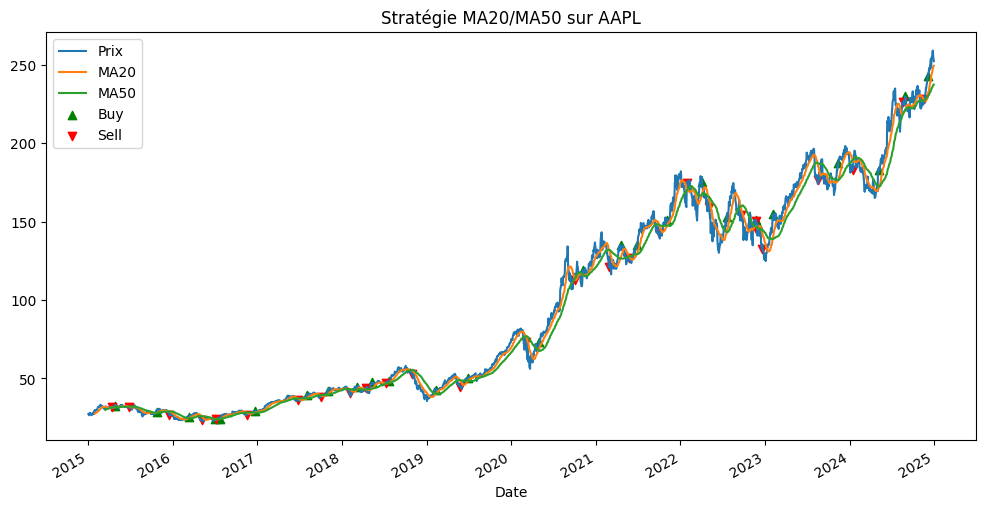

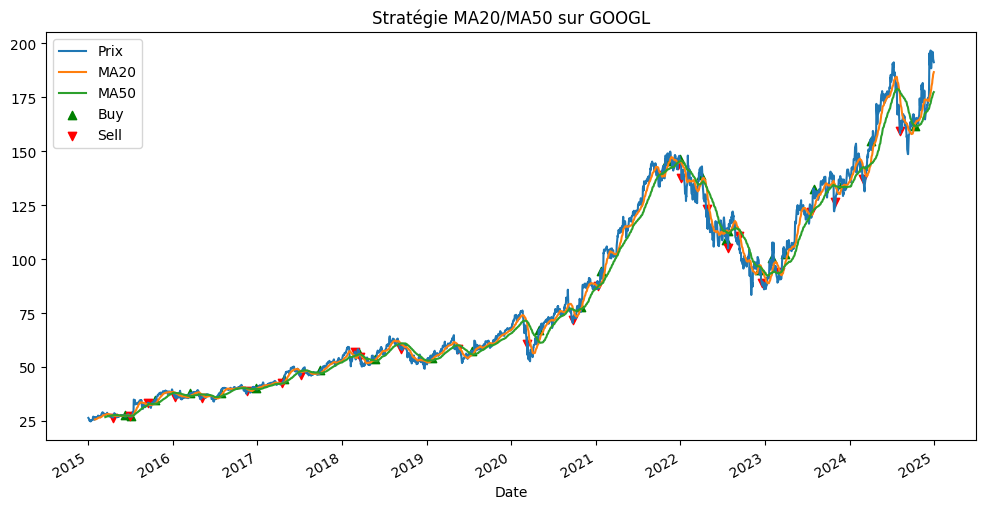

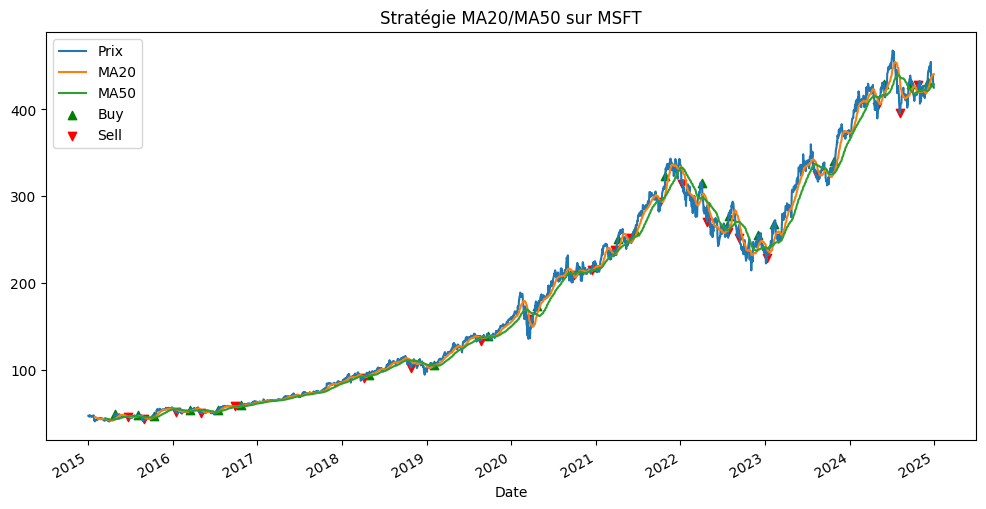

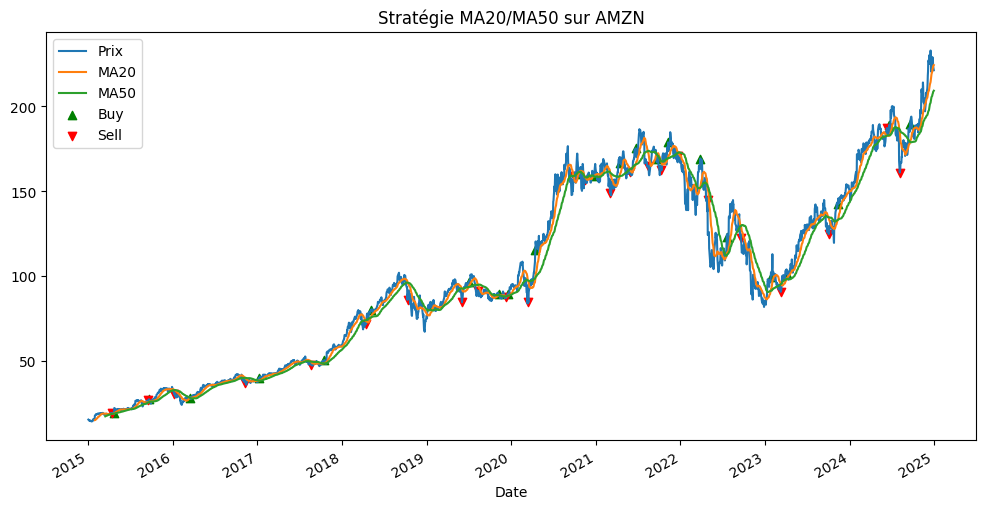

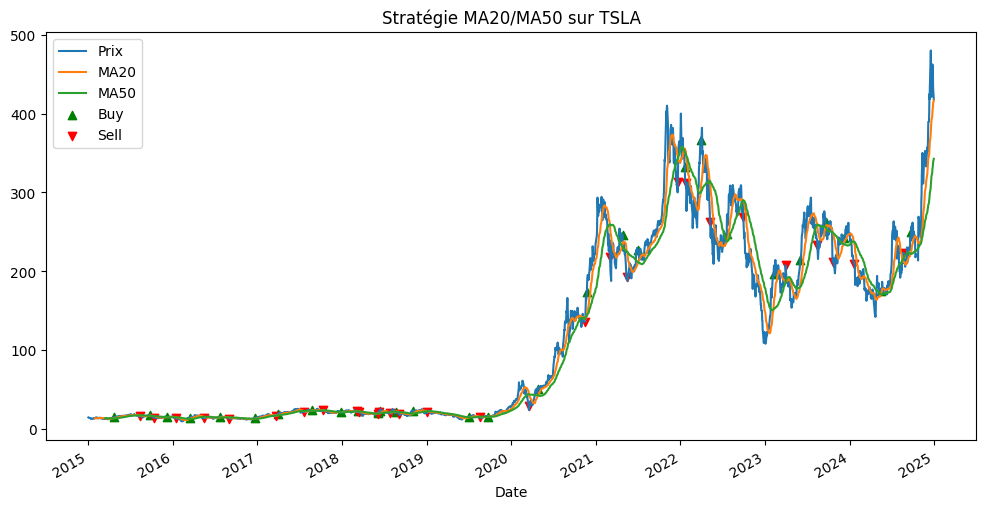

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

sources = [
    "AAPL",  # Apple
    "GOOGL",  # Alphabet (Google)
    "MSFT",   # Microsoft
    "AMZN",   # Amazon
    "TSLA"    # Tesla
]
for source in sources:
    data = pd.read_csv(f"../1-data-collection/{source}_data.csv", index_col=0, parse_dates=True)
    # Moyennes mobiles
    data['MA20'] = data['Close'].rolling(20).mean()
    data['MA50'] = data['Close'].rolling(50).mean()

    buy_signal = (data['MA20'] > data['MA50']) & (data['MA20'].shift(1) <= data['MA50'].shift(1))
    sell_signal = (data['MA20'] < data['MA50']) & (data['MA20'].shift(1) >= data['MA50'].shift(1))

    plt.figure(figsize=(12,6))
    data['Close'].plot(label='Prix')
    data['MA20'].plot(label='MA20')
    data['MA50'].plot(label='MA50')
    plt.scatter(data[buy_signal].index, data[buy_signal]['Close'], marker='^', color='g', label='Buy')
    plt.scatter(data[sell_signal].index, data[sell_signal]['Close'], marker='v', color='r', label='Sell')
    plt.legend()
    plt.title(f"Stratégie MA20/MA50 sur {source}")
    plt.show()